In [ ]:
import warnings
warnings.filterwarnings("ignore")

# importing the required packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# changing directory and verifying
%cd /content/drive/MyDrive/DISC_Files/with_cell
!ls -v

/content/drive/MyDrive/DISC_Files/with_cell
111.csv  142.csv  223.csv  263.csv  333.csv  414.csv  438.csv  463.csv	529.csv  556.csv   3311.csv
112.csv  143.csv  224.csv  264.csv  334.csv  415.csv  439.csv  464.csv	531.csv  557.csv   4110.csv
113.csv  144.csv  225.csv  311.csv  335.csv  416.csv  441.csv  465.csv	532.csv  561.csv   4111.csv
114.csv  151.csv  226.csv  312.csv  336.csv  417.csv  442.csv  466.csv	533.csv  562.csv   4210.csv
115.csv  152.csv  227.csv  313.csv  337.csv  418.csv  443.csv  467.csv	534.csv  563.csv   4211.csv
116.csv  153.csv  231.csv  314.csv  338.csv  419.csv  444.csv  511.csv	535.csv  564.csv   4310.csv
117.csv  154.csv  232.csv  315.csv  339.csv  421.csv  445.csv  512.csv	536.csv  565.csv   4311.csv
121.csv  161.csv  233.csv  316.csv  341.csv  422.csv  446.csv  513.csv	537.csv  566.csv   4410.csv
122.csv  162.csv  234.csv  317.csv  342.csv  423.csv  447.csv  514.csv	538.csv  567.csv   4411.csv
123.csv  163.csv  235.csv  318.csv  343.csv  424.csv  448.csv  51

In [ ]:
i = 418
filename = f"{i}.csv"
if os.path.exists(filename):
  print(f'Reading in {filename}')
  print('---')
  data = pd.read_csv(filename, header=None)
  # adding columns names
  data.columns = ['405', '488', '633', 'red', 'green', 'label']

# shape of the data
print(f'Shape of the data is: {data.shape}')

# viewing the data
print(data.head())

Reading in 418.csv
---
Shape of the data is: (5400000, 6)
        405       488       633       red     green  label
0 -0.002358 -0.002272 -0.002919  0.000000  0.007210      0
1 -0.004644 -0.007408 -0.001239  0.000251  0.007744      0
2 -0.006118 -0.010046 -0.000096  0.001792  0.011394      0
3 -0.006374 -0.010204  0.000338  0.002360  0.016407      0
4 -0.005401 -0.009776  0.000267  0.001872  0.017608      0


In [ ]:
# print the minimum values of each column
print("Minimum values:")
print(data.min())

# print the maximum values of each column
print("\nMaximum values:")
print(data.max())

Minimum values:
405     -0.202590
488     -0.037511
633     -0.028200
red      0.000000
green    0.000000
label    0.000000
dtype: float64

Maximum values:
405      0.507808
488      0.233856
633      0.201039
red      0.107729
green    5.630687
label    1.000000
dtype: float64


In [ ]:
data['label'].value_counts()

label
0    5395350
1       4650
Name: count, dtype: int64

In [ ]:
# function to do the following:
# creating a ‘label_modified’ column based on the original ‘label’ column.
# if there are 18 consecutive points with 1, it is retained as 1, otherwise, it is changed to 0.
# this is faster than the previous for loops since it uses numpy vectorization
def modify_data(df):

    # make groups
    df['group'] = (df['label'] != df['label'].shift()).cumsum()

    # cummulative count for each group
    df['counter'] = df.groupby('group').cumcount() + 1

    # mark the rows with the cummulative count >= K and label = 1 as True
    df['label_modified'] = (df['label'] == 1) & (df['counter'] >= 18)

    # for each group - check if any of the row is marked as 1, if so, mark all the rows in the group as True, then convert the whole column to 1/0
    df['label_modified'] = df.groupby('group')['label_modified'].transform('any').astype(int)

    # drop intermediate columns
    df.drop(['group', 'counter'], axis=1, inplace=True)

    print(df['label_modified'].value_counts())
    print('---')

    return df

In [ ]:
data = modify_data(data)

label_modified
0    5399302
1        698
Name: count, dtype: int64
---


In [ ]:
# indexes with label as 1
data[data['label_modified'] == 1].index.tolist()

[66094,
 66095,
 66096,
 66097,
 66098,
 66099,
 66100,
 66101,
 66102,
 66103,
 66104,
 66105,
 66106,
 66107,
 66108,
 66109,
 66110,
 66111,
 66112,
 66113,
 66114,
 66115,
 66116,
 66117,
 66118,
 66119,
 66120,
 66121,
 66122,
 66123,
 66124,
 66125,
 66126,
 66127,
 66128,
 66129,
 66130,
 341046,
 341047,
 341048,
 341049,
 341050,
 341051,
 341052,
 341053,
 341054,
 341055,
 341056,
 341057,
 341058,
 341059,
 341060,
 341061,
 341062,
 341063,
 341064,
 341065,
 341066,
 341067,
 341068,
 341069,
 341070,
 341071,
 341072,
 341073,
 341074,
 341075,
 450731,
 450732,
 450733,
 450734,
 450735,
 450736,
 450737,
 450738,
 450739,
 450740,
 450741,
 450742,
 450743,
 450744,
 450745,
 450746,
 450747,
 450748,
 450749,
 450750,
 450751,
 450752,
 450753,
 450754,
 450755,
 450756,
 450757,
 450758,
 450759,
 450760,
 450761,
 450762,
 906025,
 906026,
 906027,
 906028,
 906029,
 906030,
 906031,
 906032,
 906033,
 906034,
 906035,
 906036,
 906037,
 906038,
 906039,
 906040,
 9

In [ ]:
# calculate rolling correlation every 18 samples
data['rc_405_488'] = data['405'].rolling(18).corr(data['488'])
data['rc_488_633'] = data['488'].rolling(18).corr(data['633'])
data['rc_405_633'] = data['405'].rolling(18).corr(data['633'])
data['rc_405_488+633'] = (data['405']).rolling(18).corr(data['488'] + data['633'])

# calculate the difference with the previous correlation value
data['diff_rc_405_488'] = data['rc_405_488'].diff()
data['diff_rc_488_633'] = data['rc_488_633'].diff()
data['diff_rc_405_633'] = data['rc_405_633'].diff()
data['diff_rc_405_488+633'] = data['rc_405_488+633'].diff()

# taking rolling average of 5 points for the above columns
data['ma_diff_rc_405_488'] = data['diff_rc_405_488'].rolling(5).mean()
data['ma_diff_rc_488_633'] = data['diff_rc_488_633'].rolling(5).mean()
data['ma_diff_rc_405_633'] = data['diff_rc_405_633'].rolling(5).mean()
data['ma_diff_rc_405_488+633'] = data['diff_rc_405_488+633'].rolling(18).mean()

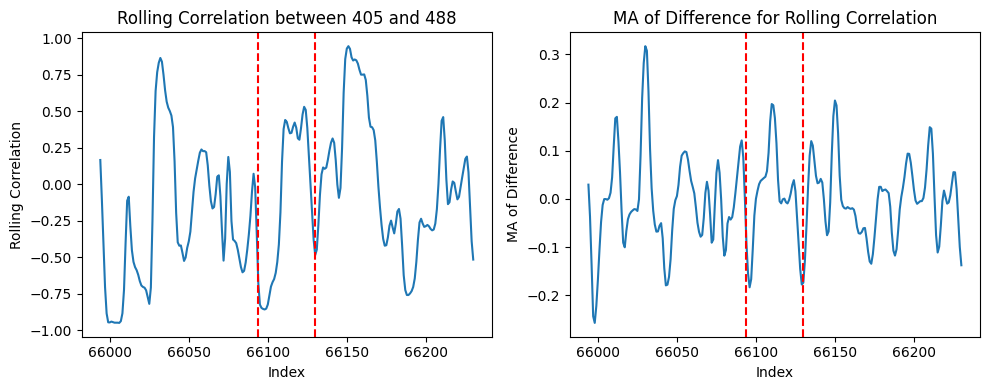

In [ ]:
# figure and subplots
fig, axs = plt.subplots(1,2, figsize=(10,4))

# plot rolling correlations between 405 and 488
axs[0].plot(data.loc[66094-100:66130+100, 'rc_405_488'])
axs[0].axvline(x=66094, color='r', linestyle='--')
axs[0].axvline(x=66130, color='r', linestyle='--')
axs[0].set_title('Rolling Correlation between 405 and 488')
axs[0].set_xlabel('Index')
axs[0].ticklabel_format(style='plain', useOffset=False)
axs[0].set_ylabel('Rolling Correlation')

# plot MA of difference for rc_405_488
axs[1].plot(data.loc[66094-100:66130+100, 'ma_diff_rc_405_488'])
axs[1].axvline(x=66094, color='r', linestyle='--')
axs[1].axvline(x=66130, color='r', linestyle='--')
axs[1].set_title('MA of Difference for Rolling Correlation')
axs[1].set_xlabel('Index')
axs[1].ticklabel_format(style='plain', useOffset=False)
axs[1].set_ylabel('MA of Difference')

plt.tight_layout()
plt.show()

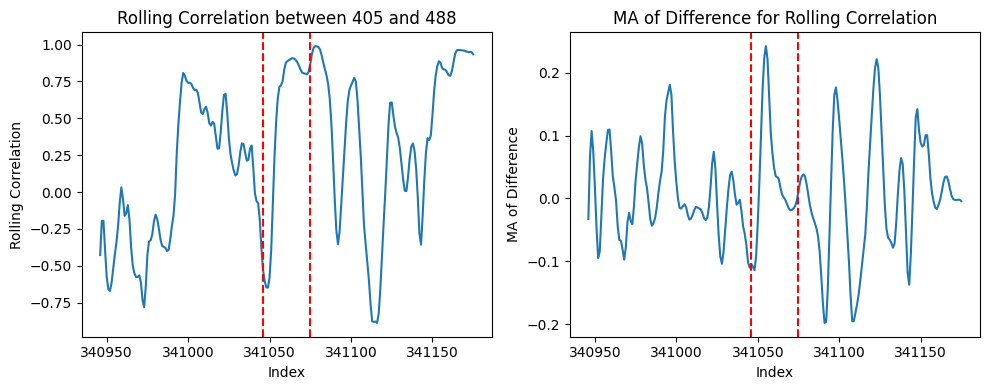

In [ ]:
# figure and subplots
fig, axs = plt.subplots(1,2, figsize=(10,4))

# plot rolling correlations between 405 and 488
axs[0].plot(data.loc[341046-100:341075+100, 'rc_405_488'])
axs[0].axvline(x=341046, color='r', linestyle='--')
axs[0].axvline(x=341075, color='r', linestyle='--')
axs[0].set_title('Rolling Correlation between 405 and 488')
axs[0].set_xlabel('Index')
axs[0].ticklabel_format(style='plain', useOffset=False)
axs[0].set_ylabel('Rolling Correlation')

# plot MA of difference for rc_405_488
axs[1].plot(data.loc[341046-100:341075+100, 'ma_diff_rc_405_488'])
axs[1].axvline(x=341046, color='r', linestyle='--')
axs[1].axvline(x=341075, color='r', linestyle='--')
axs[1].set_title('MA of Difference for Rolling Correlation')
axs[1].set_xlabel('Index')
axs[1].ticklabel_format(style='plain', useOffset=False)
axs[1].set_ylabel('MA of Difference')

plt.tight_layout()
plt.show()

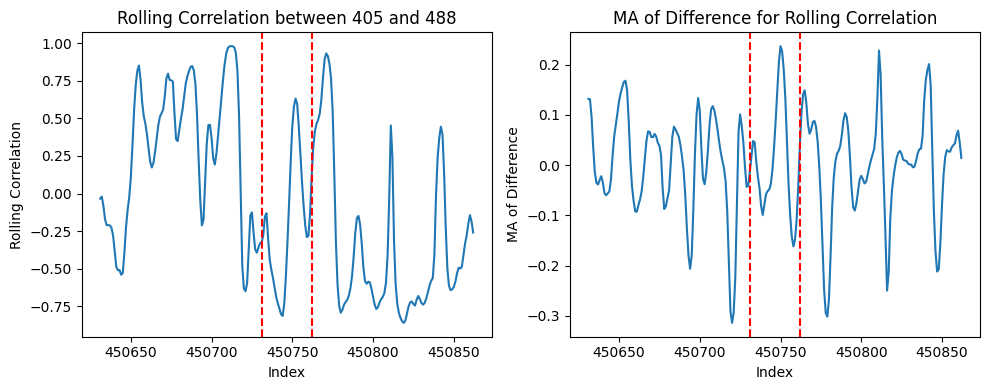

In [ ]:
# figure and subplots
fig, axs = plt.subplots(1,2, figsize=(10,4))

# plot rolling correlations between 405 and 488
axs[0].plot(data.loc[450731-100:450762+100, 'rc_405_488'])
axs[0].axvline(x=450731, color='r', linestyle='--')
axs[0].axvline(x=450762, color='r', linestyle='--')
axs[0].set_title('Rolling Correlation between 405 and 488')
axs[0].set_xlabel('Index')
axs[0].ticklabel_format(style='plain', useOffset=False)
axs[0].set_ylabel('Rolling Correlation')

# plot MA of difference for rc_405_488
axs[1].plot(data.loc[450731-100:450762+100, 'ma_diff_rc_405_488'])
axs[1].axvline(x=450731, color='r', linestyle='--')
axs[1].axvline(x=450762, color='r', linestyle='--')
axs[1].set_title('MA of Difference for Rolling Correlation')
axs[1].set_xlabel('Index')
axs[1].ticklabel_format(style='plain', useOffset=False)
axs[1].set_ylabel('MA of Difference')

plt.tight_layout()
plt.show()

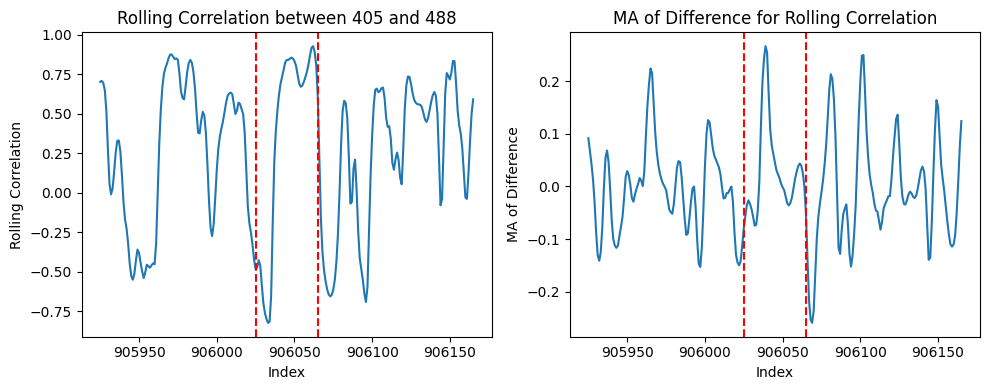

In [ ]:
# figure and subplots
fig, axs = plt.subplots(1,2, figsize=(10,4))

# plot rolling correlations between 405 and 488
axs[0].plot(data.loc[906025-100:906065+100, 'rc_405_488'])
axs[0].axvline(x=906025, color='r', linestyle='--')
axs[0].axvline(x=906065, color='r', linestyle='--')
axs[0].set_title('Rolling Correlation between 405 and 488')
axs[0].set_xlabel('Index')
axs[0].ticklabel_format(style='plain', useOffset=False)
axs[0].set_ylabel('Rolling Correlation')

# plot MA of difference for rc_405_488
axs[1].plot(data.loc[906025-100:906065+100, 'ma_diff_rc_405_488'])
axs[1].axvline(x=906025, color='r', linestyle='--')
axs[1].axvline(x=906065, color='r', linestyle='--')
axs[1].set_title('MA of Difference for Rolling Correlation')
axs[1].set_xlabel('Index')
axs[1].ticklabel_format(style='plain', useOffset=False)
axs[1].set_ylabel('MA of Difference')

plt.tight_layout()
plt.show()

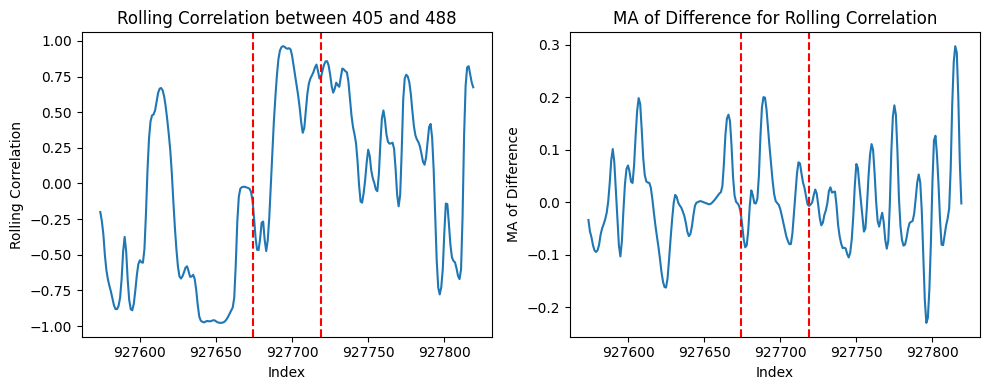

In [ ]:
# figure and subplots
fig, axs = plt.subplots(1,2, figsize=(10,4))

# plot rolling correlations between 405 and 488
axs[0].plot(data.loc[927674-100:927719+100, 'rc_405_488'])
axs[0].axvline(x=927674, color='r', linestyle='--')
axs[0].axvline(x=927719, color='r', linestyle='--')
axs[0].set_title('Rolling Correlation between 405 and 488')
axs[0].set_xlabel('Index')
axs[0].ticklabel_format(style='plain', useOffset=False)
axs[0].set_ylabel('Rolling Correlation')

# plot MA of difference for rc_405_488
axs[1].plot(data.loc[927674-100:927719+100, 'ma_diff_rc_405_488'])
axs[1].axvline(x=927674, color='r', linestyle='--')
axs[1].axvline(x=927719, color='r', linestyle='--')
axs[1].set_title('MA of Difference for Rolling Correlation')
axs[1].set_xlabel('Index')
axs[1].ticklabel_format(style='plain', useOffset=False)
axs[1].set_ylabel('MA of Difference')

plt.tight_layout()
plt.show()